## Workflow compare synthetic community to native human microbiota data from the MetaCardis study
Forslund, S.K., Chakaroun, R., Zimmermann-Kogadeeva, M. et al. Combinatorial, additive and dose-dependent drug–microbiome associations. Nature 600, 500–505 (2021). https://doi.org/10.1038/s41586-021-04177-9


Data can be downloaded from https://zenodo.org/records/6242715

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

%matplotlib inline
#%matplotlib qt

In [2]:
# define data folder
human_data_folder = '..\\InputData\\human_microbiome_data\\'

In [3]:
# define figure folder
figure_folder = '..\\Figures_for_Juan\\'

In [4]:
mydata = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Phylum.v2.data.frame.r',
                    sep='\t')

In [5]:
# pivot table to have samples vs features matrix
mydatatable = pd.pivot_table(mydata, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [6]:
# normalize features to 1 (compositional data)
mydatatable_norm = mydatatable.div(mydatatable.sum(axis=1), axis=0)

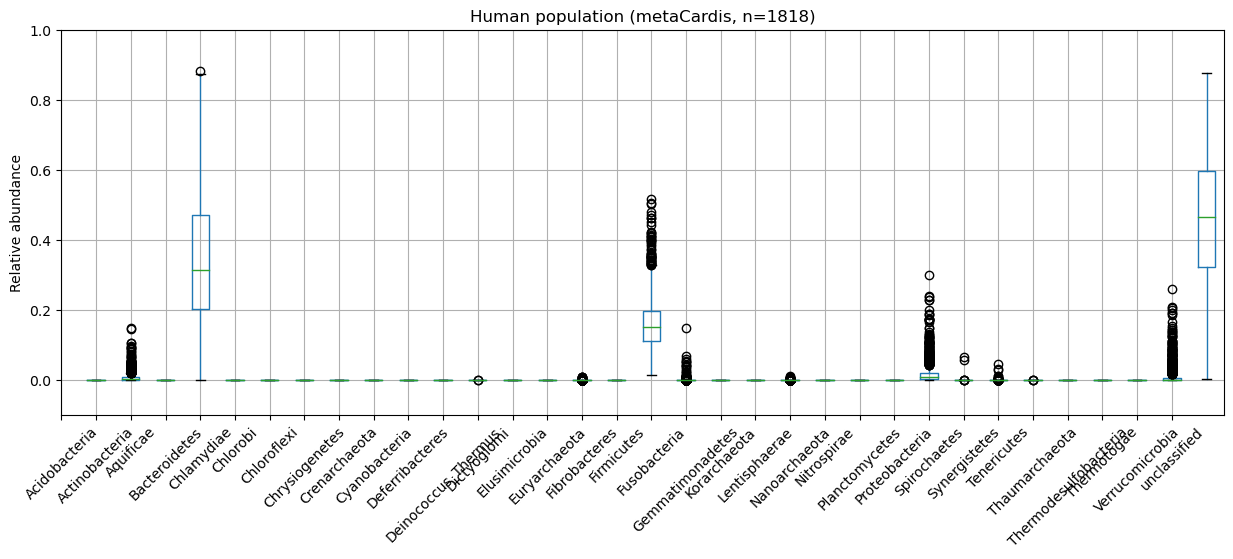

In [7]:
# plot distribution of all species across individuals
fig = plt.figure(figsize=(15, 5))
mydatatable_norm.boxplot()
plt.xticks(np.arange(0, mydatatable_norm.shape[1]), mydatatable_norm.columns);
plt.xticks(rotation=45);
ax = plt.gca()
ax.set_ylim([-0.1, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')');


In [8]:
print('Total number of phyla: ', np.shape(mydatatable_norm.columns))

Total number of phyla:  (33,)


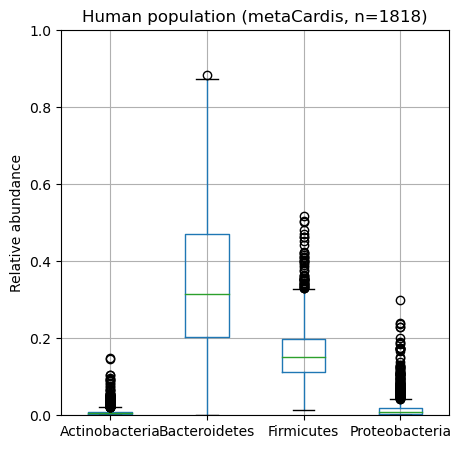

In [9]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydatatable_norm.boxplot(column = ['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria'])
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_phylum_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

## Check on species level representation of the 14 community

In [10]:
mydata_species = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Species.v2.data.frame.r',
                    sep='\t')

In [11]:
# pivot table to have samples vs features
mydata_species_table = pd.pivot_table(mydata_species, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [12]:
# normalize relative abundance
mydata_species_table = mydata_species_table.div(mydata_species_table.sum(axis=1), axis=0) 

In [13]:
[x for x in mydata_species_table.columns if x.find('vulgatus')>0]

['Bacteroides_dorei_vulgatus']

In [14]:
[x for x in mydata_species_table.columns if x.find('muciniph')>0]

['Akkermansia_muciniphila']

In [15]:
[x for x in mydata_species_table.columns if x.find('ramosum')>0]

['Clostridium_ramosum']

In [33]:
[x for x in mydata_species_table.columns if x.find('thetaiotaomicron')>0]

['Bacteroides_thetaiotaomicron']

In [34]:
my_species = ['Bacteroides_uniformis',
             'Bacteroides_dorei_vulgatus',
             'Clostridium_ramosum',
             'Eggerthella_lenta',
             'Ruminococcus_bromii',
             'Dorea_formicigenerans',
              'Clostridium_saccharolyticum',
              'Eubacterium_rectale',
              '_Ruminococcus__gnavus',
              'Fusobacterium_nucleatum',
              'Streptococcus_salivarius',
              'Streptococcus_parasanguinis',
              'Clostridium_bolteae',
              'Collinsella_aerofaciens',
              'Escherichia_coli',
              'Coprococcus_comes',
              'Roseburia_intestinalis',
              'Clostridium_perfringens',
              'Parabacteroides_merdae',
              'Bacteroides_fragilis',
              'Bacteroides_thetaiotaomicron']

In [35]:
set(my_species).intersection(mydata_species_table.columns)

{'Bacteroides_dorei_vulgatus',
 'Bacteroides_fragilis',
 'Bacteroides_thetaiotaomicron',
 'Bacteroides_uniformis',
 'Clostridium_bolteae',
 'Clostridium_perfringens',
 'Clostridium_ramosum',
 'Clostridium_saccharolyticum',
 'Collinsella_aerofaciens',
 'Coprococcus_comes',
 'Dorea_formicigenerans',
 'Eggerthella_lenta',
 'Escherichia_coli',
 'Eubacterium_rectale',
 'Fusobacterium_nucleatum',
 'Parabacteroides_merdae',
 'Roseburia_intestinalis',
 'Ruminococcus_bromii',
 'Streptococcus_parasanguinis',
 'Streptococcus_salivarius',
 '_Ruminococcus__gnavus'}

In [36]:
mydata_species_table_selected = mydata_species_table.loc[:,my_species].copy()

In [37]:
#mydata_species_table_selected.to_csv(figure_folder + 'metacardis_selected_species_abundance_4species_forJuan.csv')
mydata_species_table_selected.to_csv(figure_folder + 'metacardis_selected_species_abundance_21species_forJuan.csv')

In [38]:
mydata_species_table_selected_prevalence = mydata_species_table_selected.copy()
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence.fillna(0)

In [39]:
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence>0

In [40]:
myspecies_prevalence = mydata_species_table_selected_prevalence.sum(axis=0)*100/mydata_species_table_selected_prevalence.shape[0]

In [41]:
print("Median prevalence: ", np.median(myspecies_prevalence))

Median prevalence:  80.96809680968097


In [42]:
print("Mean prevalence: ", np.mean(myspecies_prevalence))

Mean prevalence:  67.17743202891718


In [43]:
myspecies_prevalence

Feature
Bacteroides_uniformis           97.029703
Bacteroides_dorei_vulgatus      98.569857
Clostridium_ramosum             25.907591
Eggerthella_lenta               53.410341
Ruminococcus_bromii             71.232123
Dorea_formicigenerans           91.694169
Clostridium_saccharolyticum     28.877888
Eubacterium_rectale             89.493949
_Ruminococcus__gnavus           46.149615
Fusobacterium_nucleatum          1.210121
Streptococcus_salivarius        85.643564
Streptococcus_parasanguinis     80.858086
Clostridium_bolteae             69.691969
Collinsella_aerofaciens         85.093509
Escherichia_coli                80.968097
Coprococcus_comes               85.093509
Roseburia_intestinalis          83.993399
Clostridium_perfringens          6.435644
Parabacteroides_merdae          81.518152
Bacteroides_fragilis            56.215622
Bacteroides_thetaiotaomicron    91.639164
dtype: float64

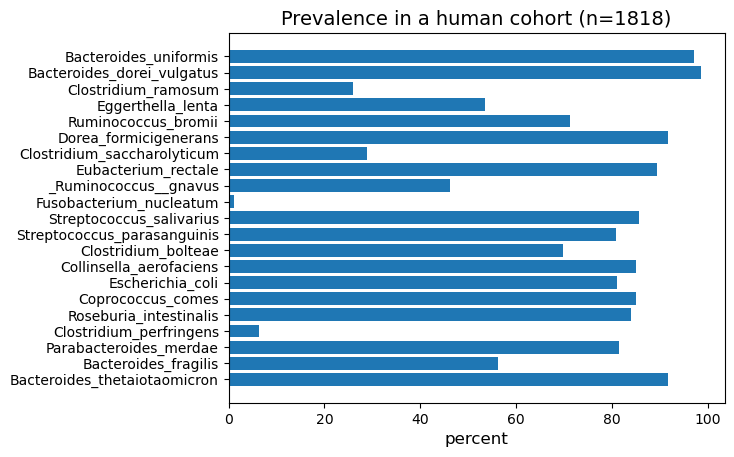

In [88]:
fig, ax = plt.subplots()
ax.barh(range(len(myspecies_prevalence)), myspecies_prevalence)
ax.set_yticks(range(len(myspecies_prevalence)))
ax.set_yticklabels(myspecies_prevalence.index)
#ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
#plt.ylabel('number of people', fontsize=12)
plt.title('Prevalence in a human cohort (n='+str(mydata_species_table_selected_prevalence.shape[0])+')', fontsize=14)
plt.gca().invert_yaxis()
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( figure_folder + 'myspecies21_prevalence_humans.pdf',
                format='pdf',
                bbox_inches='tight')

In [45]:
print('Species prevalence in human cohort (n=', str(mydata_species_table_selected_prevalence.shape[0]),
      '): mean = ', np.mean(myspecies_prevalence),
      '; median = ', np.median(myspecies_prevalence))

Species prevalence in human cohort (n= 1818 ): mean =  67.17743202891718 ; median =  80.96809680968097


In [46]:
#plt.hist(mydata_species_table_selected.sum(axis=1),bins=100)
#mydata_species_table_selected.sum(axis=1).mean()
#mydata_species_table_selected.sum(axis=1).median()

In [47]:
# bar number of species in each individual
species_per_indivudual = (mydata_species_table_selected>0).sum(axis=1)
species_per_indivudual_sum = []
for i in range(1,len(my_species)+1):
    species_per_indivudual_sum.append(np.sum(species_per_indivudual==i))

In [48]:
species_per_indivudual_sum

[0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 8,
 31,
 108,
 218,
 309,
 382,
 317,
 241,
 139,
 44,
 15,
 0,
 0]

In [49]:
print('Median species per individual: ', np.median(species_per_indivudual), 
      ' (n=', str(mydata_species_table_selected_prevalence.shape[0]), ')')

Median species per individual:  14.0  (n= 1818 )


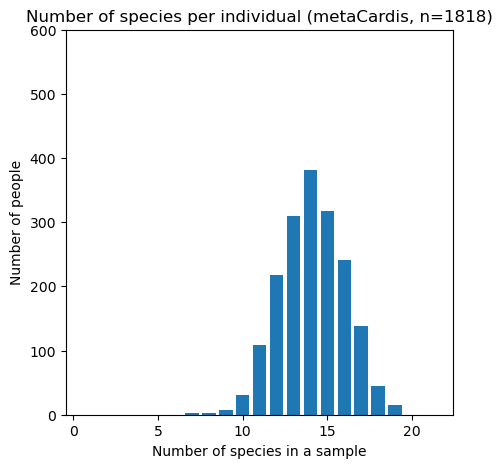

In [50]:
fig = plt.figure(figsize=(5, 5))
plt.bar(range(1,len(my_species)+1), species_per_indivudual_sum)
ax = plt.gca()
ax.set_ylim([0, 600])
ax.set_xlabel('Number of species in a sample')
ax.set_ylabel('Number of people')
ax.set_title('Number of species per individual (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_number_of_species_per_sample_21species_Juan.pdf',#4species_Juan.pdf',
                format='pdf',
                bbox_inches='tight')

In [51]:
mydata_species_table_selected

Feature,Bacteroides_uniformis,Bacteroides_dorei_vulgatus,Clostridium_ramosum,Eggerthella_lenta,Ruminococcus_bromii,Dorea_formicigenerans,Clostridium_saccharolyticum,Eubacterium_rectale,_Ruminococcus__gnavus,Fusobacterium_nucleatum,...,Streptococcus_parasanguinis,Clostridium_bolteae,Collinsella_aerofaciens,Escherichia_coli,Coprococcus_comes,Roseburia_intestinalis,Clostridium_perfringens,Parabacteroides_merdae,Bacteroides_fragilis,Bacteroides_thetaiotaomicron
SampleID,,,,,,,,,,,,,,,,,,,,,
x10MCx1134,0.094217,0.078664,0.000033,0.000096,0.031340,0.000812,0.000000,0.011645,0.000061,0.0,...,0.000015,0.000166,0.001747,0.000770,0.001042,0.000000,0.0,0.000000,0.000204,0.000568
x10MCx1135,0.003392,0.001091,0.000000,0.000000,0.000000,0.000628,0.000000,0.004243,0.000000,0.0,...,0.001172,0.000073,0.006060,0.000785,0.001713,0.006059,0.0,0.008581,0.001412,0.001973
x10MCx1138,0.012615,0.135515,0.000000,0.000832,0.000000,0.000000,0.000000,0.022364,0.000064,0.0,...,0.000037,0.001547,0.004096,0.000133,0.005894,0.018610,0.0,0.023445,0.046519,0.029374
x10MCx1140,0.053910,0.055910,0.000000,0.000000,0.000000,0.001626,0.000000,0.040219,0.003548,0.0,...,0.000408,0.000101,0.008593,0.000191,0.001128,0.001206,0.0,0.018416,0.004280,0.000863
x10MCx1143,0.085567,0.206191,0.004015,0.000253,0.000000,0.000000,0.000000,0.000000,0.006483,0.0,...,0.000000,0.018235,0.000000,0.003449,0.000000,0.000000,0.0,0.001300,0.000000,0.074675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x30MCx3384,0.007327,0.009575,0.000000,0.000000,0.000000,0.000154,0.000000,0.002863,0.035587,0.0,...,0.000033,0.000000,0.000651,0.027042,0.000609,0.000107,0.0,0.004304,0.000000,0.000311
x30MCx3412,0.313578,0.062371,0.000000,0.000000,0.000000,0.000626,0.001151,0.000000,0.000000,0.0,...,0.000000,0.000426,0.002508,0.000000,0.000612,0.003015,0.0,0.024964,0.000000,0.010829
x30MCx3414,0.005690,0.014340,0.000000,0.000000,0.000072,0.000167,0.000000,0.002958,0.000000,0.0,...,0.000202,0.000000,0.002228,0.000259,0.001417,0.003567,0.0,0.002448,0.001540,0.001969


### Make upsetplot of prevalence of subsets of the community

In [52]:
from upsetplot import UpSet, from_indicators
from matplotlib import pyplot

In [53]:
# normalize relative abundance by 14
mydata_species_table_selected_norm = mydata_species_table_selected.div(mydata_species_table_selected.sum(axis=1), axis=0) 

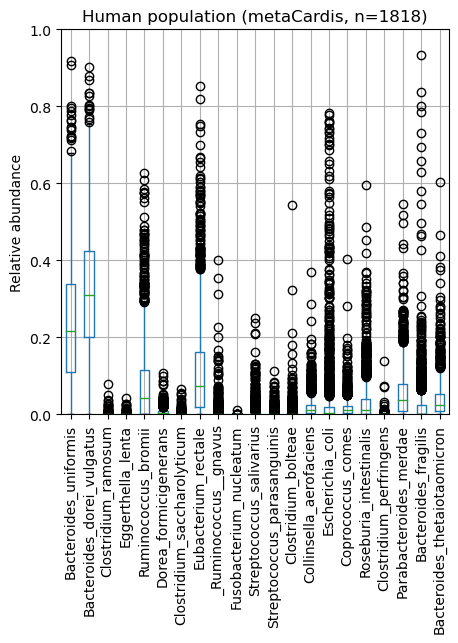

In [56]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydata_species_table_selected_norm.boxplot()
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.xticks(rotation=90)
plt.savefig( figure_folder + 'metacardis_21species_distribution.pdf',#'metacardis_4species_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

In [57]:
mydata_species_table_selected_binary = mydata_species_table_selected_norm>0

In [58]:
# Convert to UpSet-compatible format
upset_data = from_indicators(mydata_species_table_selected_binary.columns,mydata_species_table_selected_binary)

In [59]:
from upsetplot import generate_counts
from upsetplot import plot

In [60]:
example = generate_counts()

C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

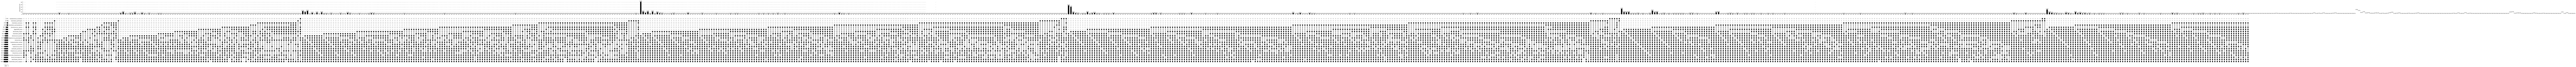

In [61]:
# Generate UpSet plot
upset = UpSet(upset_data, subset_size="count", show_percentages=True)
upset.plot()

pyplot.savefig(figure_folder + 'upset_plot_21species_coabundance.pdf')#'upset_plot_4species_coabundance.pdf') 
pyplot.show()  

Make plots of prevalence of pairwise abundance

In [62]:
mydata_species_table_selected

Feature,Bacteroides_uniformis,Bacteroides_dorei_vulgatus,Clostridium_ramosum,Eggerthella_lenta,Ruminococcus_bromii,Dorea_formicigenerans,Clostridium_saccharolyticum,Eubacterium_rectale,_Ruminococcus__gnavus,Fusobacterium_nucleatum,...,Streptococcus_parasanguinis,Clostridium_bolteae,Collinsella_aerofaciens,Escherichia_coli,Coprococcus_comes,Roseburia_intestinalis,Clostridium_perfringens,Parabacteroides_merdae,Bacteroides_fragilis,Bacteroides_thetaiotaomicron
SampleID,,,,,,,,,,,,,,,,,,,,,
x10MCx1134,0.094217,0.078664,0.000033,0.000096,0.031340,0.000812,0.000000,0.011645,0.000061,0.0,...,0.000015,0.000166,0.001747,0.000770,0.001042,0.000000,0.0,0.000000,0.000204,0.000568
x10MCx1135,0.003392,0.001091,0.000000,0.000000,0.000000,0.000628,0.000000,0.004243,0.000000,0.0,...,0.001172,0.000073,0.006060,0.000785,0.001713,0.006059,0.0,0.008581,0.001412,0.001973
x10MCx1138,0.012615,0.135515,0.000000,0.000832,0.000000,0.000000,0.000000,0.022364,0.000064,0.0,...,0.000037,0.001547,0.004096,0.000133,0.005894,0.018610,0.0,0.023445,0.046519,0.029374
x10MCx1140,0.053910,0.055910,0.000000,0.000000,0.000000,0.001626,0.000000,0.040219,0.003548,0.0,...,0.000408,0.000101,0.008593,0.000191,0.001128,0.001206,0.0,0.018416,0.004280,0.000863
x10MCx1143,0.085567,0.206191,0.004015,0.000253,0.000000,0.000000,0.000000,0.000000,0.006483,0.0,...,0.000000,0.018235,0.000000,0.003449,0.000000,0.000000,0.0,0.001300,0.000000,0.074675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x30MCx3384,0.007327,0.009575,0.000000,0.000000,0.000000,0.000154,0.000000,0.002863,0.035587,0.0,...,0.000033,0.000000,0.000651,0.027042,0.000609,0.000107,0.0,0.004304,0.000000,0.000311
x30MCx3412,0.313578,0.062371,0.000000,0.000000,0.000000,0.000626,0.001151,0.000000,0.000000,0.0,...,0.000000,0.000426,0.002508,0.000000,0.000612,0.003015,0.0,0.024964,0.000000,0.010829
x30MCx3414,0.005690,0.014340,0.000000,0.000000,0.000072,0.000167,0.000000,0.002958,0.000000,0.0,...,0.000202,0.000000,0.002228,0.000259,0.001417,0.003567,0.0,0.002448,0.001540,0.001969


In [71]:
# bar number of species in each individual
cooccurance_uniformis = []
cooccurance_vulgatus = []
for i in range(0, mydata_species_table_selected.shape[1]):
    cooccurance_uniformis.append(np.sum((mydata_species_table_selected.Bacteroides_uniformis>0) &
                                       mydata_species_table_selected.iloc[:,i]>0))
    cooccurance_vulgatus.append(np.sum((mydata_species_table_selected.Bacteroides_dorei_vulgatus>0) &
                                       mydata_species_table_selected.iloc[:,i]>0))


In [70]:
[x/mydata_species_table_selected.shape[0] for x in cooccurance_uniformis]

[0.9702970297029703,
 0.9625962596259626,
 0.24257425742574257,
 0.5121012101210121,
 0.6963696369636964,
 0.8971397139713971,
 0.27722772277227725,
 0.8701870187018702,
 0.4383938393839384,
 0.011001100110011002,
 0.83003300330033,
 0.7816281628162817,
 0.671067106710671,
 0.8366336633663366,
 0.7838283828382838,
 0.8311331133113311,
 0.819031903190319,
 0.0638063806380638,
 0.8058305830583058,
 0.5418041804180418,
 0.8971397139713971]

In [80]:
df_cooccurance = pd.DataFrame(np.column_stack([mydata_species_table_selected.columns, 
                              [x/mydata_species_table_selected.shape[0] 
                                   for x in cooccurance_uniformis], 
                              [x/mydata_species_table_selected.shape[0] 
                                   for x in cooccurance_vulgatus]]), 
                              columns=['Second_species', 
                                       'Buniformis_coocurrance', 
                                       'Pvulgatus_coocurrance'])

In [83]:
df_cooccurance = df_cooccurance.set_index('Second_species')

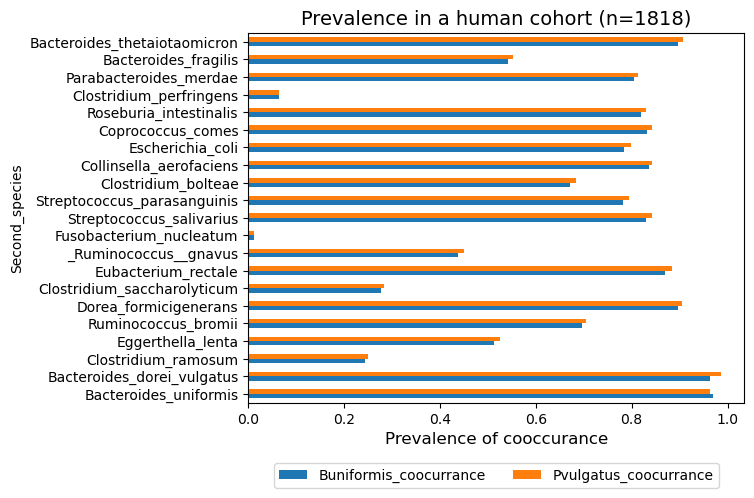

In [98]:
ax = df_cooccurance.plot.barh(rot=0)
# Add labels and title
plt.xlabel('Prevalence of cooccurance', fontsize=12)
plt.title('Prevalence in a human cohort (n='+str(mydata_species_table_selected_prevalence.shape[0])+')', fontsize=14)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),
          ncol=2)
plt.savefig( figure_folder + 'myspecies21_cooccurance_prevalence_humans.pdf',
                format='pdf',
                bbox_inches='tight')

In [99]:
# write to file
df_cooccurance.to_csv(figure_folder + 
                      'metacardis_selected_species_pairwise_cooccurance_21species_forJuan.csv')